<a href="https://colab.research.google.com/github/roasfora/file-api/blob/main/Module2_File%26API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Files

# File = CSV & JSON

##🧮 Create Excel File (once)

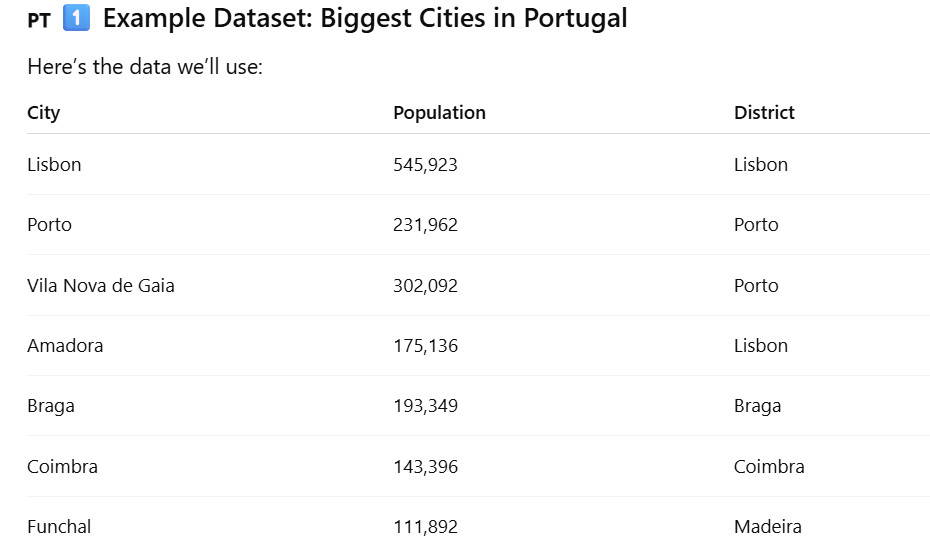

In [ ]:
import pandas as pd

data = {
    "City": ["Lisbon", "Porto", "Vila Nova de Gaia", "Amadora", "Braga", "Coimbra", "Funchal"],
    "Population": [545923, 231962, 302092, 175136, 193349, 143396, 111892],
    "District": ["Lisbon", "Porto", "Porto", "Lisbon", "Braga", "Coimbra", "Madeira"]
}

df = pd.DataFrame(data)

# Save as Excel and CSV
df.to_excel("portugal_cities.xlsx", index=False)
df.to_csv("portugal_cities.csv", index=False)

print("Files saved: portugal_cities.xlsx and portugal_cities.csv")


Files saved: portugal_cities.xlsx and portugal_cities.csv


## 📘 Reading / Writing CSV and JSON

In [ ]:
import pandas as pd

df = pd.read_csv("portugal_cities.csv")
print(df)


                City  Population District
0             Lisbon      545923   Lisbon
1              Porto      231962    Porto
2  Vila Nova de Gaia      302092    Porto
3            Amadora      175136   Lisbon
4              Braga      193349    Braga
5            Coimbra      143396  Coimbra
6            Funchal      111892  Madeira


In [ ]:
df_2 = pd.read_excel("portugal_cities.xlsx")
print(df_2)

                City  Population District
0             Lisbon      545923   Lisbon
1              Porto      231962    Porto
2  Vila Nova de Gaia      302092    Porto
3            Amadora      175136   Lisbon
4              Braga      193349    Braga
5            Coimbra      143396  Coimbra
6            Funchal      111892  Madeira


##🟨 Writing a CSV

In [ ]:
# Add a new city
new_city = {"City": "Setúbal", "Population": 123519, "District": "Setúbal"}
df.loc[len(df)] = new_city

# Save updated datac:\Users\isabe\Downloads\portugal_cities.json
df.to_csv("portugal_cities_updated.csv", index=False)


## 🟩 Writing JSON




In [ ]:
import json

data_json = df.to_dict(orient="records")

with open("portugal_cities.json", "w") as f:
    json.dump(data_json, f, indent=2)


## 🟧 Reading JSON

In [ ]:
with open("portugal_cities.json") as f:
    data_loaded = json.load(f)

print(data_loaded[2])  # show first record


{'City': 'Vila Nova de Gaia', 'Population': 302092, 'District': 'Porto'}


# API

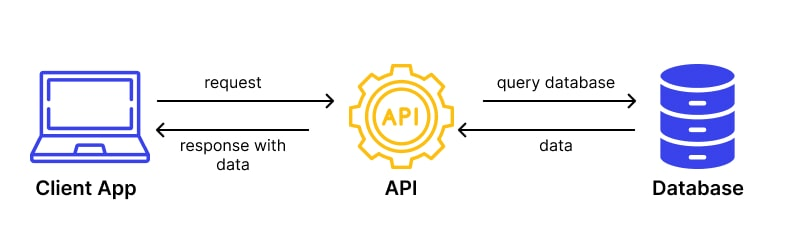



## 🎮 3. Pokémon API

In [ ]:
import requests

url = "https://pokeapi.co/api/v2/pokemon/pikachu"
r = requests.get(url)
data = r.json()

print("Name:", data["name"])
print("Height:", data["height"])
print("Weight:", data["weight"])
print("First ability:", data["abilities"][1]["ability"]["name"])


Name: pikachu
Height: 4
Weight: 60
First ability: lightning-rod


In [ ]:
print(data)

{'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}], 'base_experience': 112, 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/25.ogg', 'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/25.ogg'}, 'forms': [{'name': 'pikachu', 'url': 'https://pokeapi.co/api/v2/pokemon-form/25/'}], 'game_indices': [{'game_index': 84, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 84, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 84, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 25, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 25, 'version': {'name': 'silve

## ☀️ Weather (Open-Meteo API)

In [ ]:
import requests

url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 38.7167,      # Lisbon
    "longitude": -9.1333,
    "current_weather": True
}

r = requests.get(url, params=params)
data = r.json()

print("City: Lisbon 🇵🇹")
print("Temperature (°C):", data["current_weather"]["temperature"])
print("Wind speed (km/h):", data["current_weather"]["windspeed"])
print("Weather code:", data["current_weather"]["weathercode"])


City: Lisbon 🇵🇹
Temperature (°C): 11.1
Wind speed (km/h): 6.9
Weather code: 0


##🪙 Bitcoin


### Without API KEY

In [ ]:
import requests

url = "https://api.coingecko.com/api/v3/simple/price"
params = {"ids": "bitcoin", "vs_currencies": "usd"}

r = requests.get(url, params=params)
data = r.json()

print("Bitcoin price (USD):", data["bitcoin"]["usd"])


Bitcoin price (USD): 90993


🧠 Try: change "bitcoin" → "ethereum" or "dogecoin"

### With API KEY
https://coinmarketcap.com/api/

In [ ]:
import requests

API_KEY = "YOUR_API_KEY_HERE"

url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"
parameters = {"symbol": "BTC", "convert": "USD"}
headers = {"Accepts": "application/json", "X-CMC_PRO_API_KEY": "8b3cf8a0-8e2c-4741-8ab4-c6477b2a77fb"}

response = requests.get(url, headers=headers, params=parameters)
data = response.json()

price = data["data"]["BTC"]["quote"]["USD"]["price"]
print("Bitcoin price (USD):", round(price, 2))


Bitcoin price (USD): 90977.81


❌ Never expose API Key